<a href="https://colab.research.google.com/github/Rajeevd381/Covid-19_DS_Major_Project/blob/main/Copy_of_Covid_19_Forcasting_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Data Science Major Project

In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt


## Reading Data file

In [2]:
path='/content/drive/MyDrive/Major_Project_Data/covid_19_india.csv'
df=pd.read_csv(path)

In [3]:
df = df.iloc[0:15086]
df.head

<bound method NDFrame.head of            Sno        Date     Time  ...      Cured   Deaths  Confirmed
0          1.0  2020-01-30  6:00 PM  ...        0.0      0.0        1.0
1          2.0  2020-01-31  6:00 PM  ...        0.0      0.0        1.0
2          3.0  2020-02-01  6:00 PM  ...        0.0      0.0        2.0
3          4.0  2020-02-02  6:00 PM  ...        0.0      0.0        3.0
4          5.0  2020-02-03  6:00 PM  ...        0.0      0.0        3.0
...        ...         ...      ...  ...        ...      ...        ...
15081  15082.0  2021-05-19  8:00 AM  ...   485644.0   3012.0   536766.0
15082  15083.0  2021-05-19  8:00 AM  ...    36402.0    450.0    42776.0
15083  15084.0  2021-05-19  8:00 AM  ...   214426.0   5132.0   295790.0
15084  15085.0  2021-05-19  8:00 AM  ...  1483249.0  18072.0  1637663.0
15085  15086.0  2021-05-19  8:00 AM  ...  1026492.0  13576.0  1171861.0

[15086 rows x 9 columns]>

In [4]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [5]:
df.drop('Time',axis='columns',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   State/UnionTerritory      15086 non-null  object 
 3   ConfirmedIndianNational   15086 non-null  object 
 4   ConfirmedForeignNational  15086 non-null  object 
 5   Cured                     15086 non-null  float64
 6   Deaths                    15086 non-null  float64
 7   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(4)
memory usage: 943.0+ KB


## Perprocessing Data

In [7]:
df['Date'] =  pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15086 entries, 0 to 15085
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15086 non-null  float64       
 1   Date                      15086 non-null  datetime64[ns]
 2   State/UnionTerritory      15086 non-null  object        
 3   ConfirmedIndianNational   15086 non-null  object        
 4   ConfirmedForeignNational  15086 non-null  object        
 5   Cured                     15086 non-null  float64       
 6   Deaths                    15086 non-null  float64       
 7   Confirmed                 15086 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 943.0+ KB


In [9]:
df.fillna(value=-1, inplace=True)

In [10]:
df.head()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,Kerala,3,0,0.0,0.0,3.0


In [11]:
df.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15081,15082.0,2021-05-19,Telangana,-,-,485644.0,3012.0,536766.0
15082,15083.0,2021-05-19,Tripura,-,-,36402.0,450.0,42776.0
15083,15084.0,2021-05-19,Uttarakhand,-,-,214426.0,5132.0,295790.0
15084,15085.0,2021-05-19,Uttar Pradesh,-,-,1483249.0,18072.0,1637663.0
15085,15086.0,2021-05-19,West Bengal,-,-,1026492.0,13576.0,1171861.0


## Visualization

## Ploting Confirmed, Deaths or Cured cases in any State

In [12]:
def plot_var(var='',State=''):
    
    assert type(var)==str, "Expected string as the variable name"
    assert type(State)==str, "Expected string as the state name"
 
    y = df[df['State/UnionTerritory']==State][var]
    x = df[df['State/UnionTerritory']==State]['Date']
    plt.figure(figsize=(20,5))
    plt.title("Plot of \"{}\" for {}".format(var,State),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='red')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

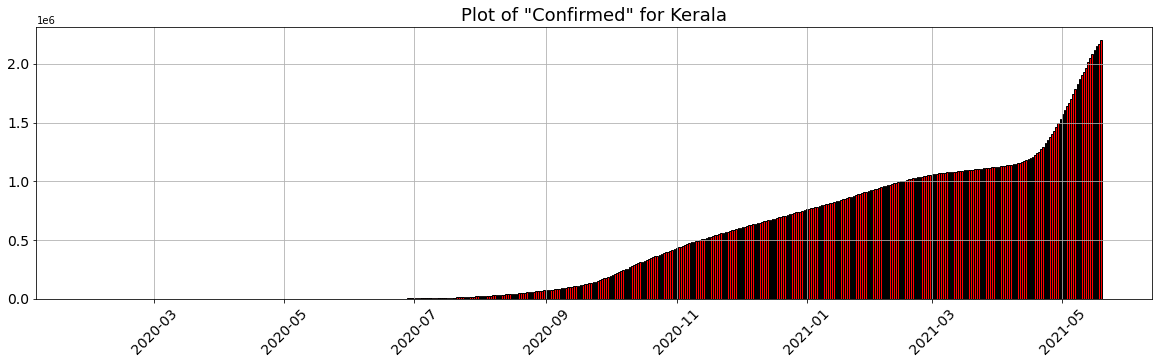

In [13]:
# Confirmed Cases in Kerala
plot_var('Confirmed','Kerala')

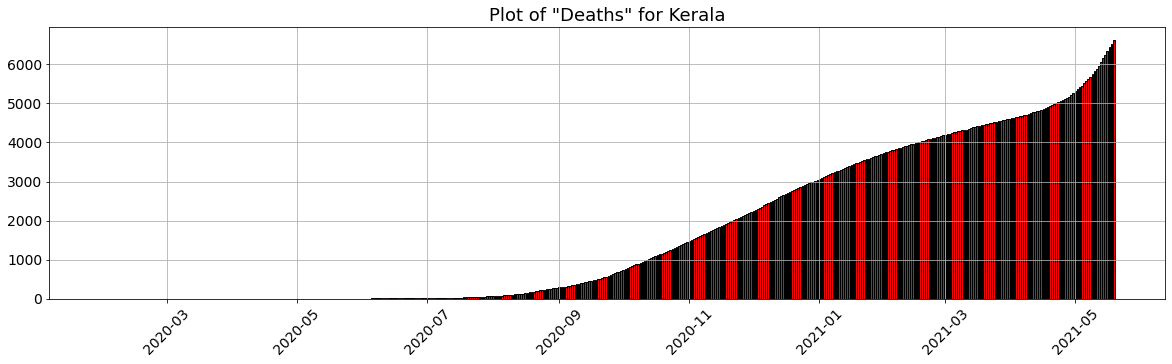

In [14]:
# Death Cases in Kerala
plot_var('Deaths','Kerala')

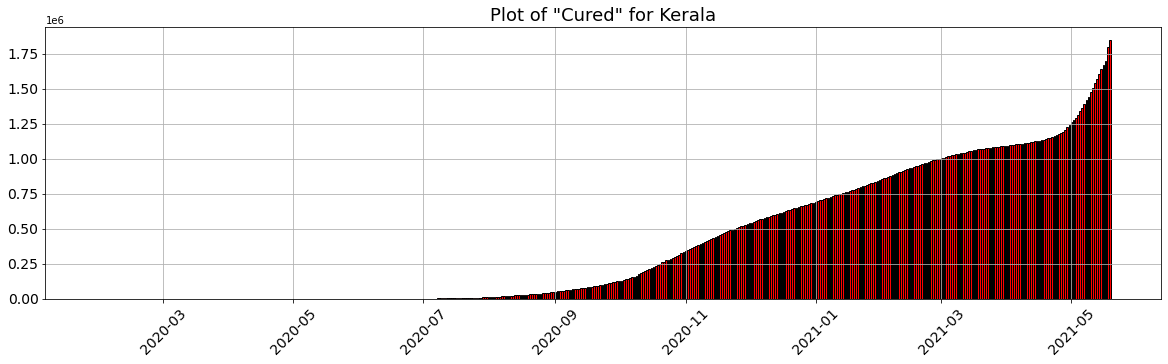

In [15]:
# Cured Cases in Kerala
plot_var('Cured','Kerala')

## Ploting Deaths vs Confirmed or Cured Vs Confirmed for any State

In [16]:
def plot_xy(varx='',vary='',state=''):
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['State/UnionTerritory']==state][vary]
    x = df[df['State/UnionTerritory']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(20,5))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

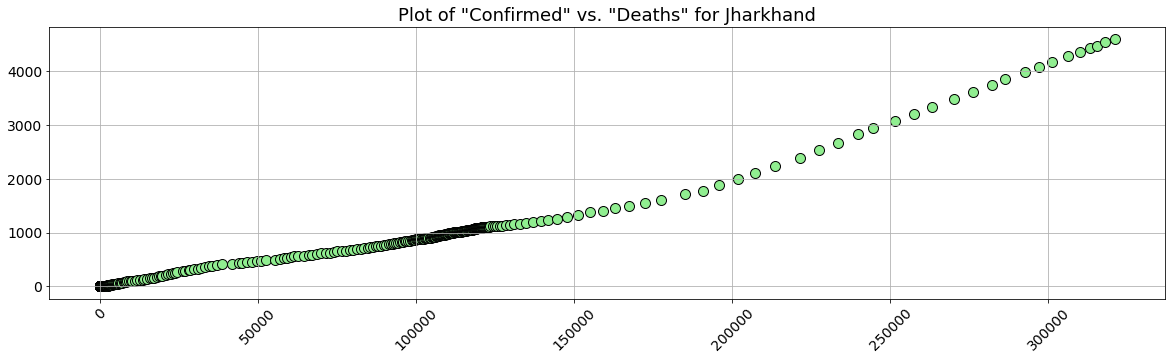

In [17]:
# Death vs Confirmed cases in Jharkhand
plot_xy('Confirmed','Deaths','Jharkhand')

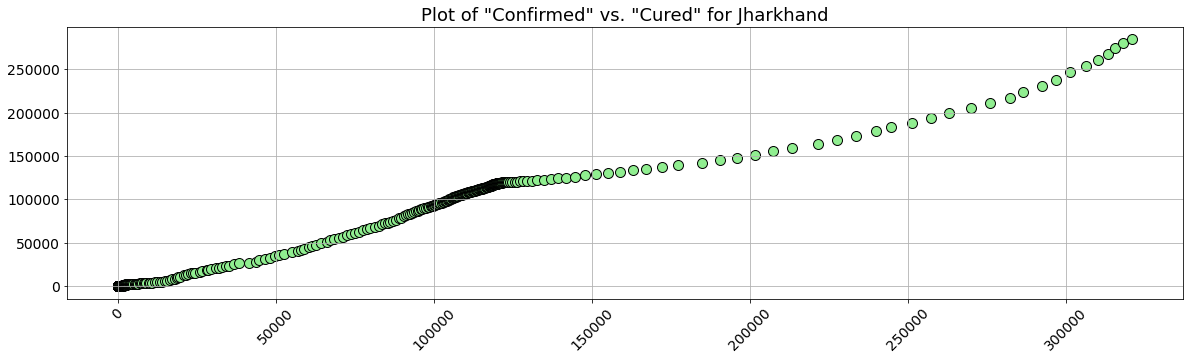

In [18]:
# Cured vs Confirmed cases in Jharkhand
plot_xy('Confirmed','Cured','Jharkhand')

## Maximum cases

In [19]:
# Maximum Death Case in any State or Union Territory
max_death = df[df['Deaths']==df['Deaths'].max()]['State/UnionTerritory']
max_death

15070    Maharashtra
Name: State/UnionTerritory, dtype: object

In [20]:
# Maximum confirmed Case in any State or Union Territory
max_death = df[df['Confirmed']==df['Confirmed'].max()]['State/UnionTerritory']
max_death

15070    Maharashtra
Name: State/UnionTerritory, dtype: object

In [21]:
# Maximum Cured Case in any State or Union Territory
max_death = df[df['Cured']==df['Cured'].max()]['State/UnionTerritory']
max_death

15070    Maharashtra
Name: State/UnionTerritory, dtype: object

## Forecasting

Forecasting Confirmed Cases for Kerala 

In [22]:
df_kerala = df[df['State/UnionTerritory'] == 'Kerala']
df_kerala = df_kerala.rename(columns ={'Date':'ds','Confirmed':'y'})
df_kerala

,Sno,ds,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,y
0,1.0,2020-01-30,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
14922,14923.0,2021-05-15,Kerala,-,-,1636790.0,6243.0,2085583.0
14958,14959.0,2021-05-16,Kerala,-,-,1666232.0,6339.0,2118263.0
14994,14995.0,2021-05-17,Kerala,-,-,1700528.0,6428.0,2147967.0
15030,15031.0,2021-05-18,Kerala,-,-,1800179.0,6515.0,2169369.0


In [23]:
from fbprophet import Prophet
model1 = Prophet(changepoint_prior_scale=0.5)
model1.fit(df_kerala)
x1 = model1.make_future_dataframe(periods = 100,freq='D')
forecast = model1.predict(x1)
df2 = forecast[['ds','trend','yhat_lower','yhat_upper','yhat']]
df2

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,yhat
0,2020-01-30,-1.256405e+03,-1.131364e+05,1.018608e+05,-4.360046e+03
1,2020-01-31,-1.232032e+03,-1.091718e+05,1.040727e+05,-3.064964e+03
2,2020-02-01,-1.207659e+03,-1.044744e+05,1.028412e+05,-1.881319e+03
3,2020-02-02,-1.183286e+03,-1.067517e+05,1.025566e+05,-5.358153e+02
4,2020-02-03,-1.158912e+03,-1.004426e+05,1.096162e+05,4.049182e+02
...,...,...,...,...,...
571,2021-08-23,2.626891e+06,2.376594e+06,2.887357e+06,2.628455e+06
572,2021-08-24,2.636133e+06,2.396907e+06,2.883561e+06,2.637248e+06
573,2021-08-25,2.645374e+06,2.402266e+06,2.897341e+06,2.647657e+06
574,2021-08-26,2.654616e+06,2.394244e+06,2.900727e+06,2.651512e+06


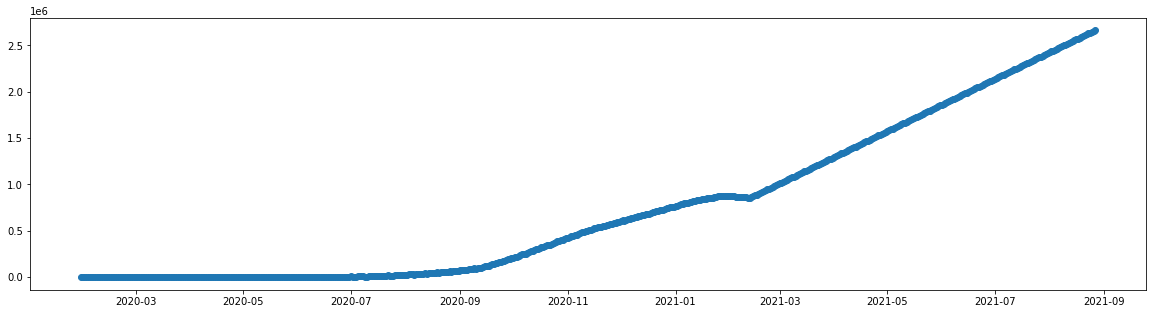

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df2['ds'],df2['yhat'])

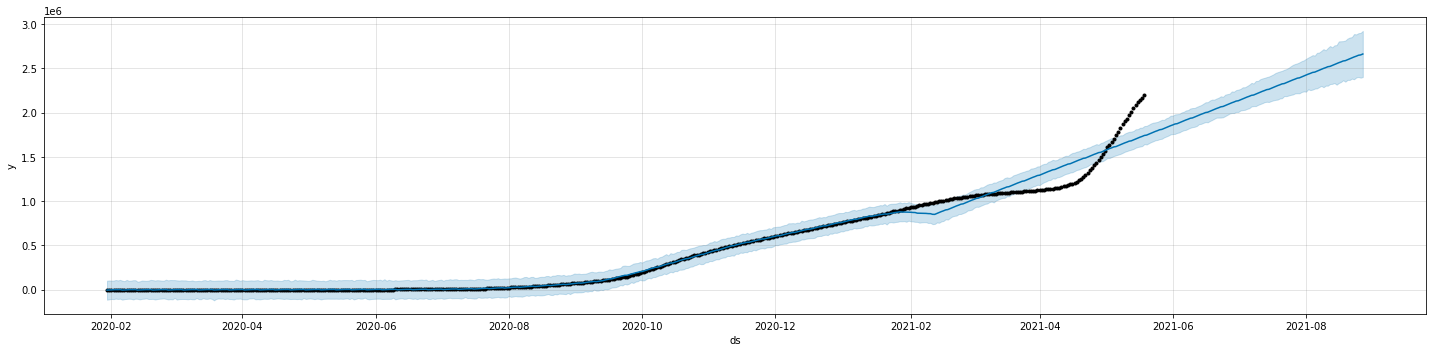

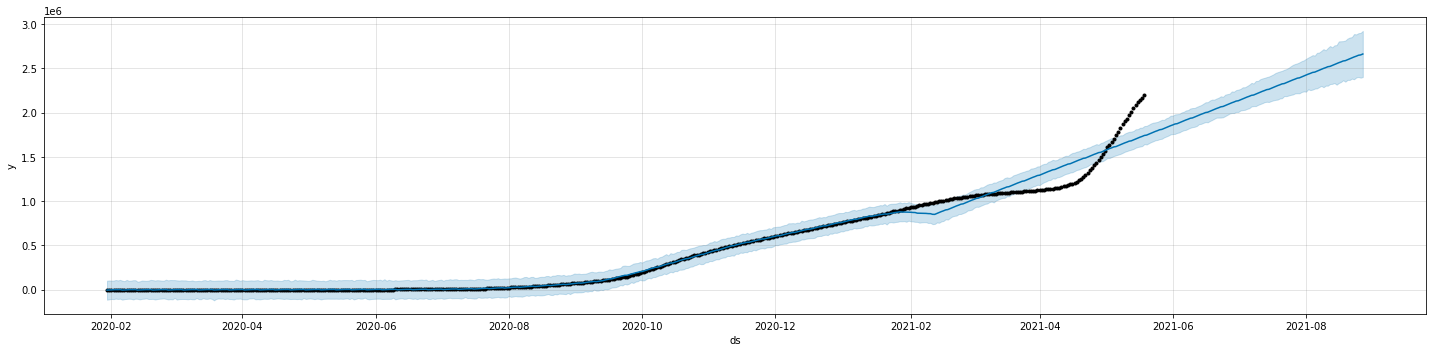

In [25]:
model1.plot(forecast,figsize=(20,5))

Forecasting Death cases for Delhi

In [26]:
df_dl = df[df['State/UnionTerritory'] == 'Delhi']
df_dl = df_dl.rename(columns ={'Date':'ds','Deaths':'y'})
df_dl

,Sno,ds,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,y,Confirmed
34,35.0,2020-03-02,Delhi,1,0,0.0,0.0,1.0
38,39.0,2020-03-03,Delhi,1,0,0.0,0.0,1.0
42,43.0,2020-03-04,Delhi,1,0,0.0,0.0,1.0
45,46.0,2020-03-05,Delhi,2,0,0.0,0.0,2.0
51,52.0,2020-03-06,Delhi,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
14914,14915.0,2021-05-15,Delhi,-,-,1288280.0,20907.0,1380981.0
14950,14951.0,2021-05-16,Delhi,-,-,1299872.0,21244.0,1387411.0
14986,14987.0,2021-05-17,Delhi,-,-,1309578.0,21506.0,1393867.0
15022,15023.0,2021-05-18,Delhi,-,-,1320496.0,21846.0,1398391.0


In [27]:
from fbprophet import Prophet
model2 = Prophet(changepoint_prior_scale=0.5)
model2.fit(df_dl)
x2 = model2.make_future_dataframe(periods = 100,freq='D')
forecast2 = model1.predict(x2)
df3 = forecast2[['ds','trend','yhat_lower','yhat_upper','yhat']]
df3

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,yhat
0,2020-03-02,-4.764594e+02,-1.040786e+05,1.084840e+05,1.087371e+03
1,2020-03-03,-4.520879e+02,-9.620455e+04,1.028820e+05,6.635013e+02
2,2020-03-04,-4.277165e+02,-1.096407e+05,1.070515e+05,1.855626e+03
3,2020-03-05,-4.033451e+02,-1.104647e+05,9.665890e+04,-3.506986e+03
4,2020-03-06,-3.789736e+02,-9.768244e+04,1.054745e+05,-2.211905e+03
...,...,...,...,...,...
539,2021-08-23,2.626891e+06,2.385083e+06,2.869979e+06,2.628455e+06
540,2021-08-24,2.636133e+06,2.380131e+06,2.901398e+06,2.637248e+06
541,2021-08-25,2.645374e+06,2.394065e+06,2.904316e+06,2.647657e+06
542,2021-08-26,2.654616e+06,2.398536e+06,2.905595e+06,2.651512e+06


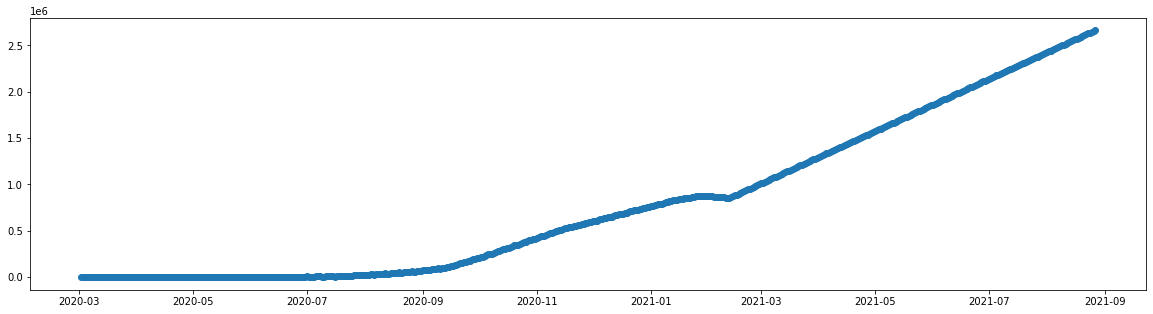

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df3['ds'],df3['yhat'])

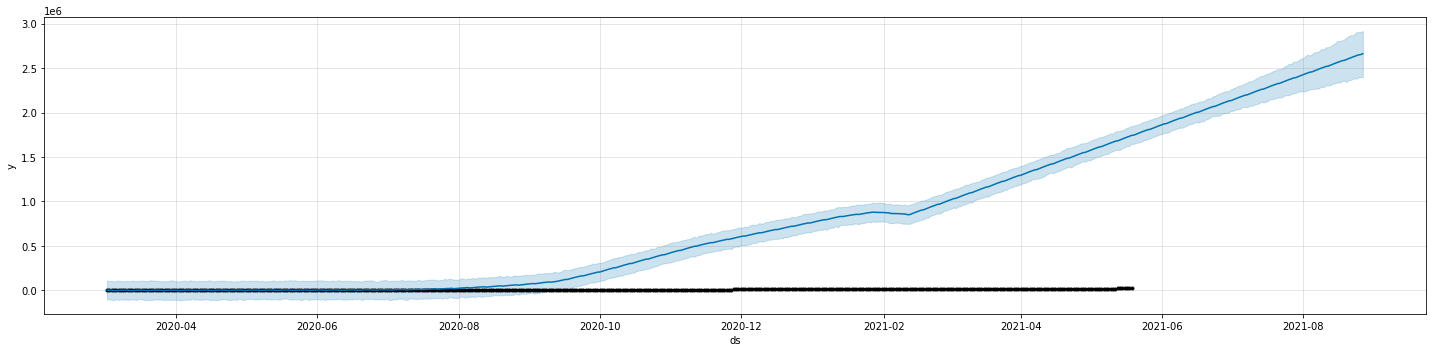

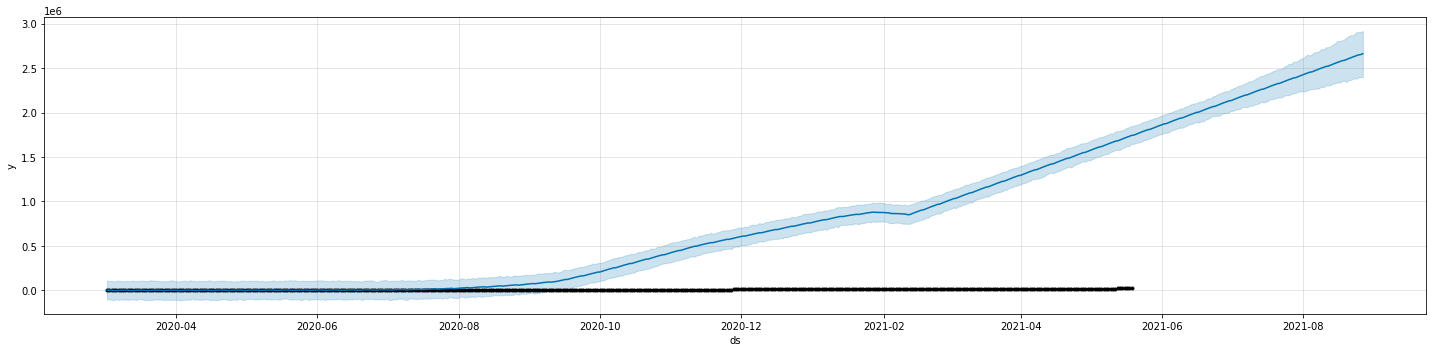

In [29]:
model2.plot(forecast2,figsize=(20,5))

Forecasting Cured cases for Punjab

In [30]:
df_pun = df[df['State/UnionTerritory'] == 'Punjab']
df_pun = df_pun.rename(columns ={'Date':'ds','Cured':'y'})
df_pun

,Sno,ds,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,y,Deaths,Confirmed
77,78.0,2020-03-09,Punjab,1,0,0.0,0.0,1.0
92,93.0,2020-03-10,Punjab,1,0,0.0,0.0,1.0
107,108.0,2020-03-11,Punjab,1,0,0.0,0.0,1.0
118,119.0,2020-03-12,Punjab,1,0,0.0,0.0,1.0
131,132.0,2020-03-13,Punjab,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
14933,14934.0,2021-05-15,Punjab,-,-,393148.0,11477.0,483984.0
14969,14970.0,2021-05-16,Punjab,-,-,401273.0,11693.0,490755.0
15005,15006.0,2021-05-17,Punjab,-,-,410332.0,11895.0,497705.0
15041,15042.0,2021-05-18,Punjab,-,-,418884.0,12086.0,504586.0


In [31]:
from fbprophet import Prophet
model3 = Prophet(changepoint_prior_scale=0.5)
model3.fit(df_dl)
x3 = model3.make_future_dataframe(periods = 100,freq='D')
forecast3 = model1.predict(x3)
df4 = forecast3[['ds','trend','yhat_lower','yhat_upper','yhat']]
df4

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,yhat
0,2020-03-02,-4.764594e+02,-9.994532e+04,1.007502e+05,1.087371e+03
1,2020-03-03,-4.520879e+02,-1.012672e+05,1.022228e+05,6.635013e+02
2,2020-03-04,-4.277165e+02,-9.980400e+04,1.091276e+05,1.855626e+03
3,2020-03-05,-4.033451e+02,-1.030371e+05,1.029541e+05,-3.506986e+03
4,2020-03-06,-3.789736e+02,-1.083288e+05,1.033772e+05,-2.211905e+03
...,...,...,...,...,...
539,2021-08-23,2.626891e+06,2.383673e+06,2.864606e+06,2.628455e+06
540,2021-08-24,2.636133e+06,2.400197e+06,2.887896e+06,2.637248e+06
541,2021-08-25,2.645374e+06,2.404408e+06,2.891741e+06,2.647657e+06
542,2021-08-26,2.654616e+06,2.407634e+06,2.910092e+06,2.651512e+06


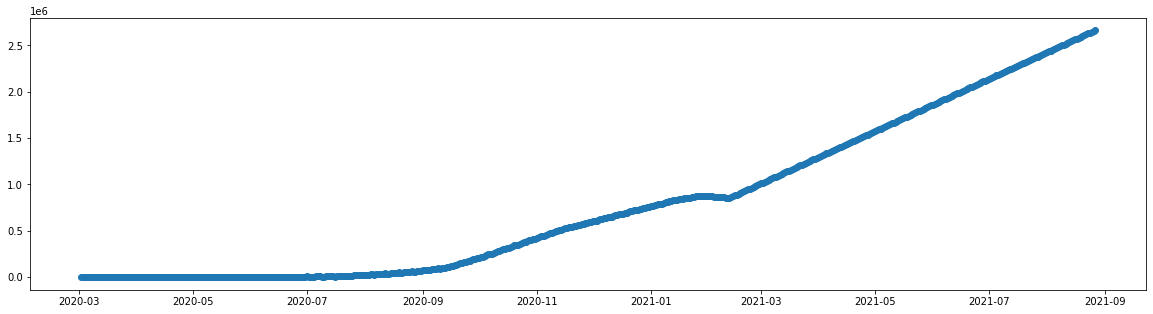

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(df4['ds'],df4['yhat'])

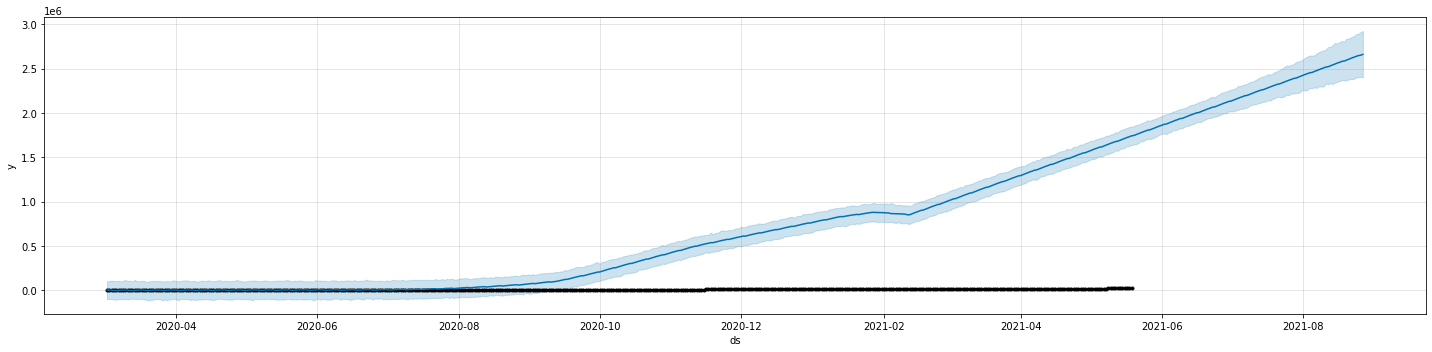

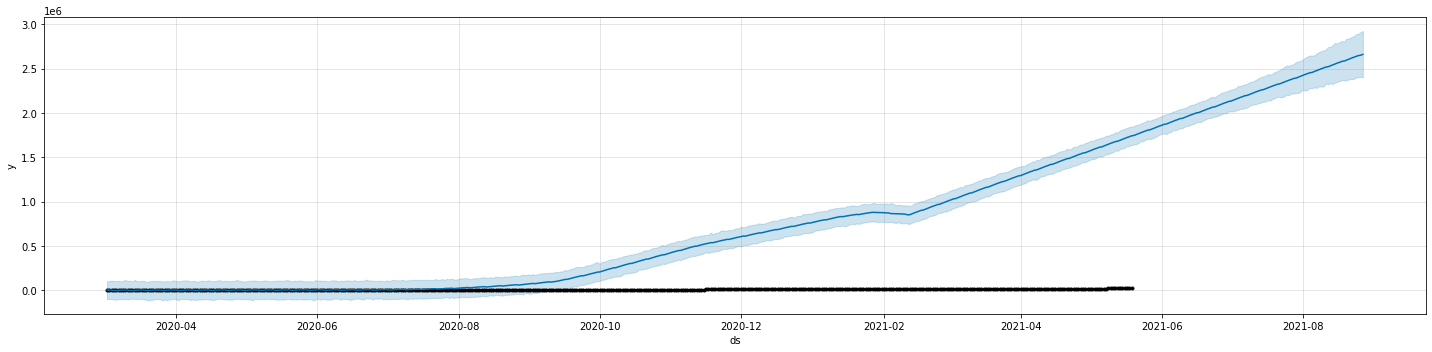

In [33]:
model3.plot(forecast3,figsize=(20,5))

# ***Thank You***